<a href="https://colab.research.google.com/github/Member09/DeepLearning_Projects/blob/main/Cats_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'dogs-vs-cats:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F3362%2F31148%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240619%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240619T104202Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5b187b61aa08bda951319a6b38677147fc8745ed09dd4e23303f493e6e8fdab9b6a20aa03d7662df6f2fe817344249528c24aa05fe6d2724c6da1533f8f6e3f4690024e313da8bcebebfbb71f365a452cce5aded211f354714a0e57853e8542858f0eff9f7f9adced438c04ef1c3bd5c6f028ce47eef81a982b87ce93bbf4d03b5975191ae47133ec2c61e961374566dbe9007427f1b65c7e2797a58c6acc9eb91a447f90f4138ceb244cb4c50a08fe75251d5d96b03afceb29ad6d348977254cc5239a978dae82bebc50a1a79b97669f954af8d1da35b42d8ccf8576b13882dca332d6994174bdf15898af68de8a68c723df7b96cdf14714482b6ed63ca0998'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [ ]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

import torch
import torch.nn as nn
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import transforms

In [ ]:

import os
import zipfile
path = "/kaggle/working/train"
test_path = "/kaggle/input/dogs-vs-cats/test1.zip"
train_path = "/kaggle/input/dogs-vs-cats/train.zip"

with zipfile.ZipFile(train_path, 'r') as zip_ref:
    zip_ref.extractall(path)

extracted_path = os.path.join(path, 'train')
filenames = os.listdir(extracted_path)
print(f"Total files : {len(filenames)}")

# Getting the cats and dogs labels
cat_images = [filename for filename in filenames if filename.__contains__("cat")]
dog_images = [filename for filename in filenames if filename.__contains__("dog")]

print(f"Total cat images : {len(cat_images)}, and Total dog images : {len(dog_images)}")




Total files : 25000
Total cat images : 12500, and Total dog images : 12500


In [ ]:
cat_images

['cat.5859.jpg',
 'cat.12335.jpg',
 'cat.7620.jpg',
 'cat.9514.jpg',
 'cat.9964.jpg',
 'cat.10812.jpg',
 'cat.4245.jpg',
 'cat.3260.jpg',
 'cat.11567.jpg',
 'cat.5863.jpg',
 'cat.9037.jpg',
 'cat.7640.jpg',
 'cat.3294.jpg',
 'cat.3467.jpg',
 'cat.6522.jpg',
 'cat.1045.jpg',
 'cat.6944.jpg',
 'cat.2644.jpg',
 'cat.4147.jpg',
 'cat.240.jpg',
 'cat.9952.jpg',
 'cat.1699.jpg',
 'cat.9957.jpg',
 'cat.5251.jpg',
 'cat.12413.jpg',
 'cat.6502.jpg',
 'cat.10369.jpg',
 'cat.5643.jpg',
 'cat.5098.jpg',
 'cat.7546.jpg',
 'cat.11475.jpg',
 'cat.12483.jpg',
 'cat.7451.jpg',
 'cat.2908.jpg',
 'cat.2224.jpg',
 'cat.12071.jpg',
 'cat.1050.jpg',
 'cat.9670.jpg',
 'cat.1024.jpg',
 'cat.4158.jpg',
 'cat.9292.jpg',
 'cat.9675.jpg',
 'cat.5402.jpg',
 'cat.1713.jpg',
 'cat.7398.jpg',
 'cat.6219.jpg',
 'cat.5506.jpg',
 'cat.11268.jpg',
 'cat.11885.jpg',
 'cat.6608.jpg',
 'cat.11397.jpg',
 'cat.8349.jpg',
 'cat.1489.jpg',
 'cat.1371.jpg',
 'cat.5558.jpg',
 'cat.10747.jpg',
 'cat.11270.jpg',
 'cat.381.jpg',
 'c

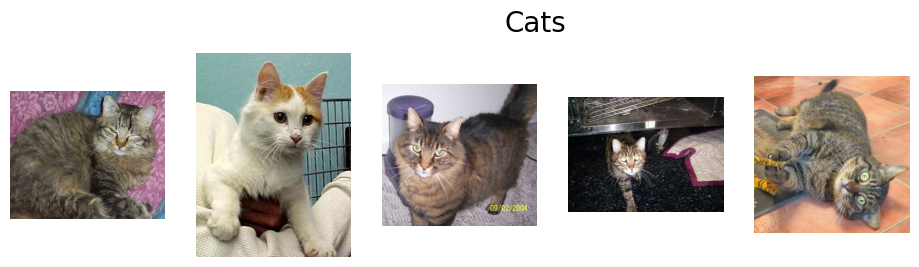

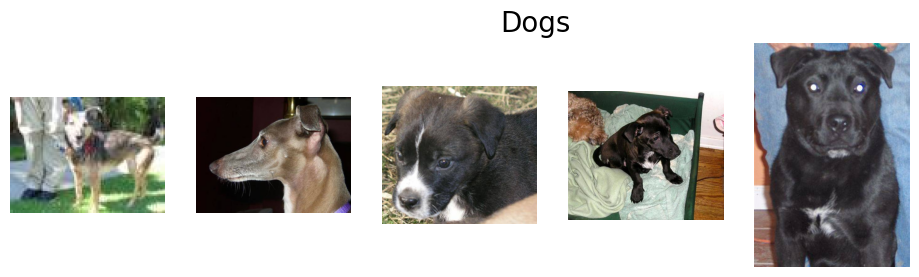

In [ ]:
# Let's see few of the images !
np.random.seed(109)
cat_images_sample = np.random.choice(cat_images, 5)
dog_images_sample = np.random.choice(dog_images, 5)

def plot_images(images:list, title:str):
    plt.figure(figsize=(14,3))
    for i, img_name in enumerate(images):
        plt.subplot(1, 6, i+1)
        img = cv2.imread(os.path.join(extracted_path, img_name))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title, fontsize=20)
    plt.show()

# Plot the images
plot_images(cat_images_sample, "Cats")
plot_images(dog_images_sample, "Dogs")


In [ ]:
train_data = cat_images[2500:] + dog_images[2500:]
val_data = cat_images[:2500] +  dog_images[:2500]
np.random.shuffle(train_data)
np.random.shuffle(val_data)

sample_path = "/kaggle/input/dogs-vs-cats/sampleSubmission.csv"

subm_df = pd.read_csv(sample_path)

subm_df

,id,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
12495,12496,0
12496,12497,0
12497,12498,0
12498,12499,0


In [ ]:
class dataset(Dataset):
    def __init__(self, paths, transform=None):
        self.paths = paths
        self.transform = transform

    def __getitem__(self, idx):
        full_path = os.path.join(extracted_path, self.paths[idx])
        img = Image.open(full_path)
        img = img.resize((227, 227))
        label = self.paths[idx][:3]
        if self.transform:
            img = self.transform(img)
            img = img.type(torch.float32)
        return img, int(label=="cat")

    def __len__(self):
        return len(self.paths)

transform = transforms.Compose([transforms.PILToTensor()])

train_ds = dataset(train_data, transform)
val_ds = dataset(val_data, transform)

train_loader = DataLoader(train_ds, shuffle=True, batch_size=32)
val_loader = DataLoader(val_ds, shuffle=True, batch_size=32)


In [ ]:
# for i, (images,labels) in enumerate(train_loader):
#     print(i)
#     print(images, labels)

train_ds.__getitem__(0)

(tensor([[[ 61.,  63.,  67.,  ..., 105., 102., 101.],
          [ 57.,  58.,  61.,  ..., 105., 102., 101.],
          [ 61.,  60.,  58.,  ..., 104., 102., 102.],
          ...,
          [ 95.,  97., 100.,  ...,  14.,  12.,  11.],
          [ 92.,  94.,  97.,  ...,  10.,   9.,   9.],
          [ 89.,  91.,  94.,  ...,   9.,   8.,   8.]],
 
         [[ 26.,  28.,  31.,  ..., 116., 113., 112.],
          [ 23.,  23.,  24.,  ..., 116., 113., 112.],
          [ 27.,  25.,  22.,  ..., 115., 113., 113.],
          ...,
          [103., 105., 108.,  ...,  17.,  15.,  14.],
          [100., 102., 105.,  ...,  12.,  11.,  11.],
          [ 97.,  99., 102.,  ...,  11.,  10.,  10.]],
 
         [[  4.,   5.,   6.,  ..., 136., 133., 132.],
          [  0.,   0.,   1.,  ..., 136., 133., 132.],
          [  3.,   1.,   0.,  ..., 134., 132., 132.],
          ...,
          [116., 118., 121.,  ...,  16.,  14.,  13.],
          [113., 115., 118.,  ...,  11.,  10.,  10.],
          [110., 112., 115.,  .

In [ ]:
class AlexNet(nn.Module):
    def __init__(self, num_classes):
        super(AlexNet, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4)
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, padding="same")
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv3 = nn.Conv2d(256, 384, kernel_size=3, padding='same')
        self.conv4 = nn.Conv2d(384, 384, kernel_size=3, padding='same')
        self.conv5 = nn.Conv2d(384, 256, kernel_size=3, padding='same')
        self.pool3 = nn.MaxPool2d(kernel_size=3, stride=2)

        self.ln1 = nn.Linear(9216, 4096)
        self.ln2 = nn.Linear(4096, 4096)
        self.ln3 = nn.Linear(4096, num_classes)

    def forward(self, x):
        out = nn.ReLU()(self.conv1(x))
        out = self.pool1(out)
        out = self.pool2(nn.ReLU()(self.conv2(out)))
        out = nn.ReLU()(self.conv3(out))
        out = nn.ReLU()(self.conv4(out))
        out = nn.ReLU()(self.conv5(out))
        out = self.pool3(out)
        out = nn.Flatten()(out)
        out = nn.ReLU()(self.ln1(out))
        out = nn.ReLU()(self.ln2(out))
        out = self.ln3(out)
        return out



In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
model = AlexNet(2).to(device)
num_epochs = 10
lr = 0.005
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
def train():
    epoch_loss = 0
    for i, (images,labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        #forward
        out = model(images)
        loss= criterion(out, labels)
        epoch_loss += loss
        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if 1%5==0:
            print(f"++++ Step {i+1}/{len(train_loader)},  Epoch Loss : {epoch_loss}")
    return epoch_loss/len(train_loader)


def get_val_loss():
    epoch_loss = 0
    with torch.no_grad():
        for i, (images, labels) in enumerate(val_loader):
            images, labels = images.to(device), labels.to(device)
            # forward
            out = model(images)
            loss = criterion(out, labels)
            epoch_loss += loss
    return epoch_loss/len(val_loader)

In [ ]:
train_losses = []
val_losses = []
best_score = float("inf")
tol = 0


for epoch in range(num_epochs):
    print(f"epoch {epoch+1}")
    model.train(True)
    avg_train_epoch_loss = train()

    model.eval()
    avg_val_epoch_loss = get_val_loss()

    if avg_val_epoch_loss < best_score:
        best_score = avg_val_epoch_loss
        torch.save(model.state_dict(), f"model_{epoch+1}")
    else:
        tol += 1
        if tol == 4:
            break
    train_losses.append(avg_train_epoch_loss)
    val_losses.append(avg_val_epoch_loss)

    print(f"epoch : {epoch+1} ---> avg train loss : {avg_train_epoch_loss}, avg val loss : {avg_val_epoch_loss}")
    print("*"*50)



epoch 1
